### Maps with Shapefiles

- Working with geodataframes
- Different ways of ploting maps
- polygons, lines and point
- geometric operations

In [1]:
# Import geopandas library
import geopandas as gpd

### Cartographic Datasets
Cartography of Galicia in vector format for xeographic information systems.

https://www.sergas.es/Saude-publica/GIS-Cartografia-Galicia-formato-vectorial-SHP

https://www.sergas.es/Saude-publica/GIS-Concellos

In [2]:
# Load data
df_concellos = gpd.read_file('../datasets/Concellos/Concellos_IGN.shp')
df_concellos.head()

,NomeConcel,CodCONC,Concello,CodCOM,CodPROV,NomeCapita,Comarca,Provincia,CODIGOINE,NomeMAY,Shape_Leng,Shape_Area,VALOR,geometry
0,Sarreaus,32078.0,Sarreaus,32.0,32.0,Sarreaus,A Limia,Ourense,32078,SARREAUS,40754.205361,7.725592e+07,NaN,"POLYGON ((608813.195 4664453.146, 608701.934 4..."
1,Taboadela,32079.0,Taboadela,37.0,32.0,Taboadela,Ourense,Ourense,32079,TABOADELA,23378.040256,2.517205e+07,NaN,"POLYGON ((593815.346 4676211.812, 593751.767 4..."
2,A Bola,32014.0,"Bola, A",39.0,32.0,"Bola, A",Terra De Celanova,Ourense,32014,A BOLA,25533.370597,3.488287e+07,NaN,"POLYGON ((588198.821 4663569.770, 588204.697 4..."
3,Maside,32045.0,Maside,35.0,32.0,Maside,O Carballiño,Ourense,32045,MASIDE,27891.138676,4.001874e+07,NaN,"POLYGON ((577375.148 4694642.899, 577328.854 4..."
4,Trasmiras,32082.0,Trasmiras,32.0,32.0,Trasmiras,A Limia,Ourense,32082,TRASMIRAS,38334.093117,5.670926e+07,NaN,"POLYGON ((613123.723 4648827.622, 613103.413 4..."


In [3]:
# Show teh coordinate system
# https://spatialreference.org/ref/epsg/etrs89-utm-zone-29n/
print(df_concellos.crs)

EPSG:25829


<Axes: >

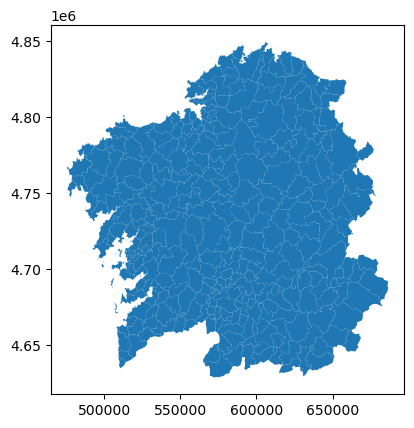

In [4]:
# Draw the map of Concellos
df_concellos.plot()

<Axes: >

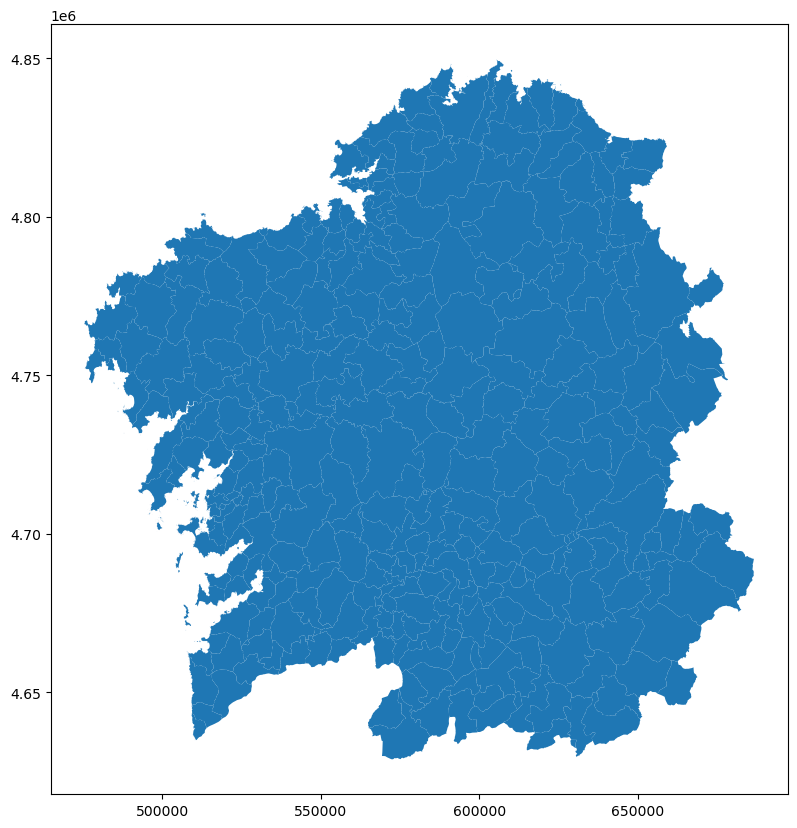

In [5]:
# Change size
df_concellos.plot(figsize=(10,10))

The plot functions paint, by default, the Geometry column, where you can find us:
- POLYGON
- LINE
- POINT

<Axes: >

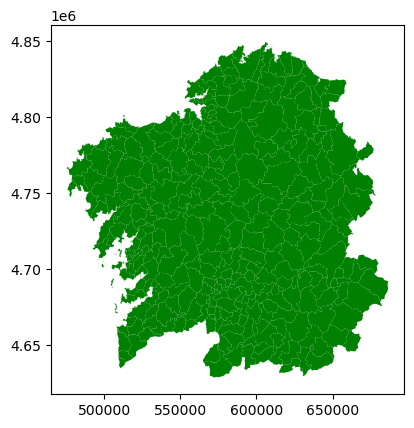

In [6]:
# we can define how to paint an area or border of a polygon
# Lista de cores: https://matplotlib.org/stable/gallery/color/named_colors.html
df_concellos.plot(color='green')

<Axes: >

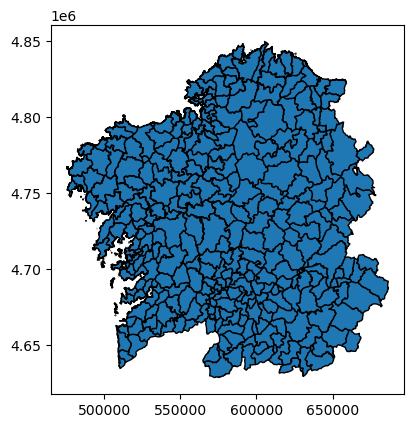

In [7]:
df_concellos.plot(edgecolor='black')

<Axes: >

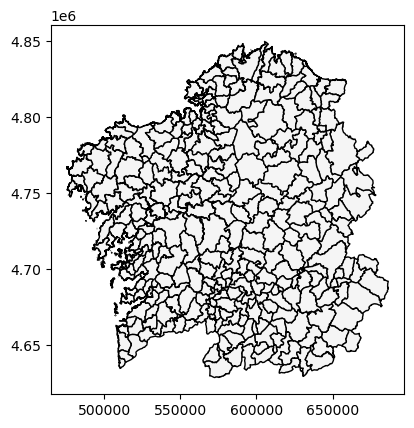

In [8]:
df_concellos.plot(color='whitesmoke',edgecolor='black')

In [11]:
# Download and load the list of population entities
df_poboacions = gpd.read_file('../datasets/Concellos/Concellos_IGN.shp')
df_poboacions.head()

,NomeConcel,CodCONC,Concello,CodCOM,CodPROV,NomeCapita,Comarca,Provincia,CODIGOINE,NomeMAY,Shape_Leng,Shape_Area,VALOR,geometry
0,Sarreaus,32078.0,Sarreaus,32.0,32.0,Sarreaus,A Limia,Ourense,32078,SARREAUS,40754.205361,7.725592e+07,NaN,"POLYGON ((608813.195 4664453.146, 608701.934 4..."
1,Taboadela,32079.0,Taboadela,37.0,32.0,Taboadela,Ourense,Ourense,32079,TABOADELA,23378.040256,2.517205e+07,NaN,"POLYGON ((593815.346 4676211.812, 593751.767 4..."
2,A Bola,32014.0,"Bola, A",39.0,32.0,"Bola, A",Terra De Celanova,Ourense,32014,A BOLA,25533.370597,3.488287e+07,NaN,"POLYGON ((588198.821 4663569.770, 588204.697 4..."
3,Maside,32045.0,Maside,35.0,32.0,Maside,O Carballiño,Ourense,32045,MASIDE,27891.138676,4.001874e+07,NaN,"POLYGON ((577375.148 4694642.899, 577328.854 4..."
4,Trasmiras,32082.0,Trasmiras,32.0,32.0,Trasmiras,A Limia,Ourense,32082,TRASMIRAS,38334.093117,5.670926e+07,NaN,"POLYGON ((613123.723 4648827.622, 613103.413 4..."


In [12]:
df_poboacions.shape

(313, 14)

In [13]:
df_poboacions.crs

<Projected CRS: EPSG:25829>
Name: ETRS89 / UTM zone 29N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 12°W and 6°W: Faroe Islands - onshore and offshore; Ireland - offshore; Jan Mayen - onshore and offshore; Portugal - onshore and offshore; Spain - onshore and offshore; United Kingdom - UKCS offshore.
- bounds: (-12.0, 34.91, -6.0, 74.13)
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

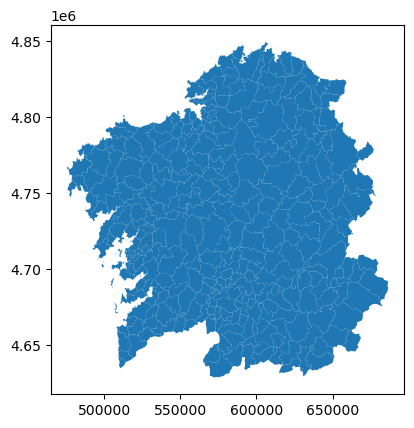

In [14]:
df_poboacions.plot()

<Axes: >

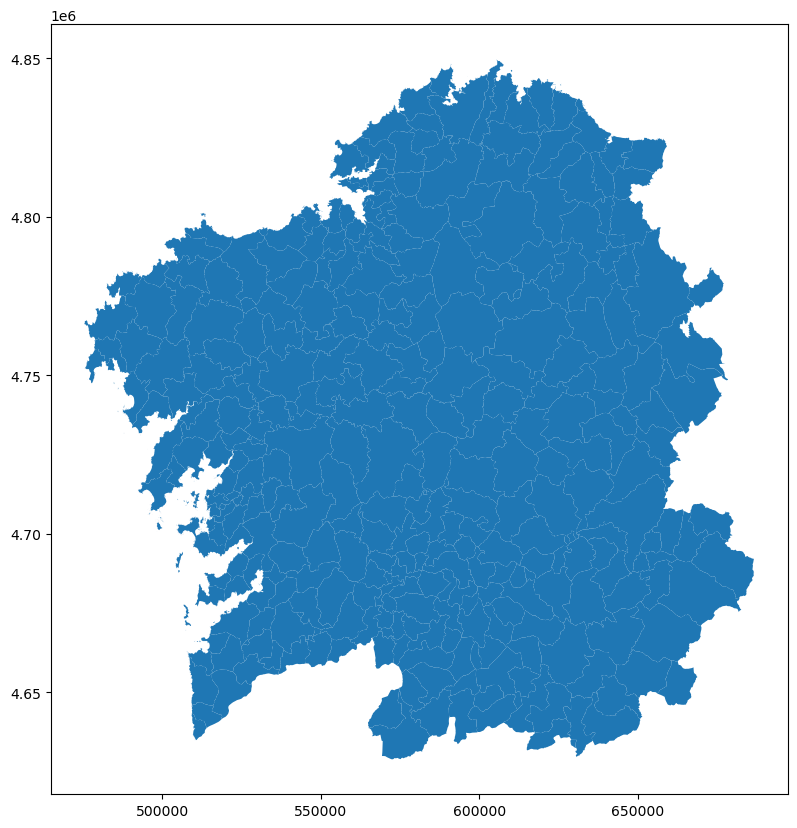

In [15]:
df_poboacions.plot(markersize=0.05,figsize=(10,10))

<Axes: >

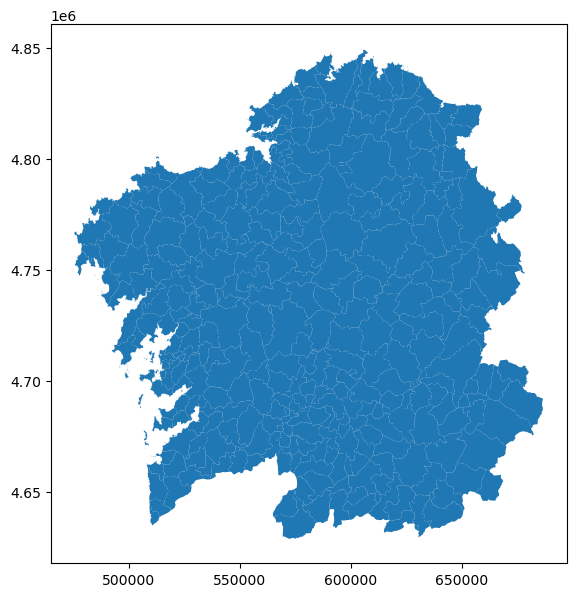

In [16]:
# It is possible to plot several datasets at the same time
base = df_concellos.plot(color='whitesmoke',figsize=(7,7))
df_poboacions.plot(markersize=0.1,ax=base)

In [17]:
# Download 'redes de transporte', por exemplo: a rede de ferrocarril
# https://www.sergas.es/Saude-publica/GIS-Cartografia-Galicia-formato-vectorial-SHP
df_tren = gpd.read_file('../datasets/Ferrocarril/FFCC_AVE.shp')
df_tren.head()

,OBJECTID,LAYER,TRAMO_NOME,DOBLE_VIA,ELECTRIFIC,ESTADO,SITUACION,DATA_INAUG,SHAPE_LEN,geometry
0,3667,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,ELE,None,18.680424,"LINESTRING (616700.927 4769185.103, 616705.841..."
1,3668,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,SUP,None,2594.247331,"LINESTRING (616705.841 4769203.125, 616707.479..."
2,3669,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,ELE,None,29.683626,"LINESTRING (616180.091 4771542.456, 616161.413..."
3,3673,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,SUP,None,818.318499,"LINESTRING (615305.206 4772608.309, 615289.889..."
4,3674,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,SUP,None,4115.064540,"LINESTRING (616161.413 4771565.527, 616138.426..."


In [18]:
df_tren.crs

<Projected CRS: EPSG:25829>
Name: ETRS89 / UTM zone 29N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 12°W and 6°W: Faroe Islands - onshore and offshore; Ireland - offshore; Jan Mayen - onshore and offshore; Portugal - onshore and offshore; Spain - onshore and offshore; United Kingdom - UKCS offshore.
- bounds: (-12.0, 34.91, -6.0, 74.13)
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

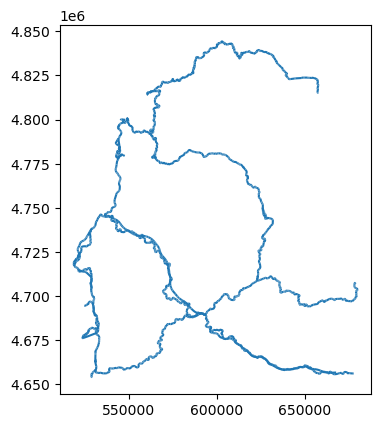

In [19]:
df_tren.plot()

<Axes: >

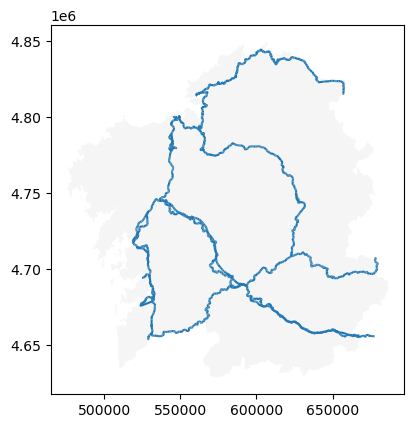

In [20]:
base = df_concellos.plot(color='whitesmoke')
df_tren.plot(ax=base)

In [ ]:
# The geometry column allows for different operations related to the space depending on the type of data it stores.

In [21]:
df_concellos.head(2)

,NomeConcel,CodCONC,Concello,CodCOM,CodPROV,NomeCapita,Comarca,Provincia,CODIGOINE,NomeMAY,Shape_Leng,Shape_Area,VALOR,geometry
0,Sarreaus,32078.0,Sarreaus,32.0,32.0,Sarreaus,A Limia,Ourense,32078,SARREAUS,40754.205361,7.725592e+07,NaN,"POLYGON ((608813.195 4664453.146, 608701.934 4..."
1,Taboadela,32079.0,Taboadela,37.0,32.0,Taboadela,Ourense,Ourense,32079,TABOADELA,23378.040256,2.517205e+07,NaN,"POLYGON ((593815.346 4676211.812, 593751.767 4..."


In [22]:
# We can calculate the area of polygons in km2.
df_concellos.area / 10**6

0       77.255915
1       25.172050
2       34.882871
3       40.018741
4       56.709259
          ...    
308     62.489742
309     44.149508
310    167.840900
311     24.968578
312    214.373225
Length: 313, dtype: float64

In [23]:
df_concellos[df_concellos.Concello == 'Ferrol'].area / 10**6

52    83.277963
dtype: float64

In [24]:
# We can calculate the length of a line
df_tren.head(2)

,OBJECTID,LAYER,TRAMO_NOME,DOBLE_VIA,ELECTRIFIC,ESTADO,SITUACION,DATA_INAUG,SHAPE_LEN,geometry
0,3667,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,ELE,None,18.680424,"LINESTRING (616700.927 4769185.103, 616705.841..."
1,3668,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,SUP,None,2594.247331,"LINESTRING (616705.841 4769203.125, 616707.479..."


In [25]:
df_tren.length

0         18.680424
1       2594.247331
2         29.683626
3        818.318499
4       4115.064540
           ...     
3415     170.680183
3416       6.034503
3417     630.713842
3418       4.116838
3419     515.942328
Length: 3420, dtype: float64

In [26]:
df_tren.drop('SHAPE_LEN',axis='columns',inplace=True)
df_tren.head(3)

,OBJECTID,LAYER,TRAMO_NOME,DOBLE_VIA,ELECTRIFIC,ESTADO,SITUACION,DATA_INAUG,geometry
0,3667,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,ELE,None,"LINESTRING (616700.927 4769185.103, 616705.841..."
1,3668,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,SUP,None,"LINESTRING (616705.841 4769203.125, 616707.479..."
2,3669,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,ELE,None,"LINESTRING (616180.091 4771542.456, 616161.413..."


In [27]:
df_tren.length

0         18.680424
1       2594.247331
2         29.683626
3        818.318499
4       4115.064540
           ...     
3415     170.680183
3416       6.034503
3417     630.713842
3418       4.116838
3419     515.942328
Length: 3420, dtype: float64

In [ ]:
# We can paint the maps in a different way for each line depending on the internal data of the dataframe.
# For example: different colors for different size towns
# different colors for train lines of different category

# One of the strategies is to create a new column 'color' in the dataframe, where to indicate the color to be painted.

In [28]:
df_concellos.head(3)

,NomeConcel,CodCONC,Concello,CodCOM,CodPROV,NomeCapita,Comarca,Provincia,CODIGOINE,NomeMAY,Shape_Leng,Shape_Area,VALOR,geometry
0,Sarreaus,32078.0,Sarreaus,32.0,32.0,Sarreaus,A Limia,Ourense,32078,SARREAUS,40754.205361,7.725592e+07,NaN,"POLYGON ((608813.195 4664453.146, 608701.934 4..."
1,Taboadela,32079.0,Taboadela,37.0,32.0,Taboadela,Ourense,Ourense,32079,TABOADELA,23378.040256,2.517205e+07,NaN,"POLYGON ((593815.346 4676211.812, 593751.767 4..."
2,A Bola,32014.0,"Bola, A",39.0,32.0,"Bola, A",Terra De Celanova,Ourense,32014,A BOLA,25533.370597,3.488287e+07,NaN,"POLYGON ((588198.821 4663569.770, 588204.697 4..."


In [29]:
# Pintar de azul as provincias que teñen mar, de vermello as que non 
df_concellos['color'] = df_concellos.Provincia.apply(lambda x: 'red' if x == 'Ourense' else 'blue')

<Axes: >

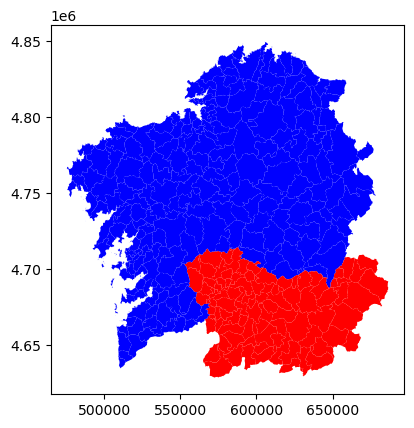

In [30]:
df_concellos.plot(color=df_concellos.color)